In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

N=10000

In [2]:
def running_mean(X,N,N1):
    "returns the mean up to the i-th point"
    Y=np.cumsum(X,axis=0)
    o=np.ones(N)
    o2=np.cumsum(o).reshape(-1,1)
    return(Y/o2)

# Gaussian

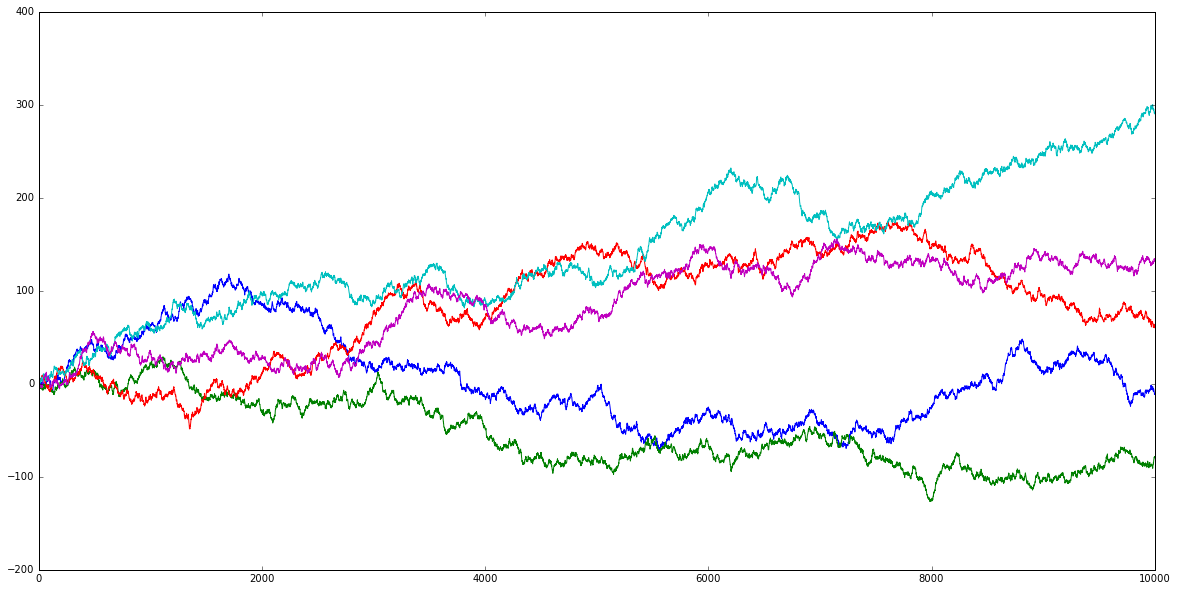

In [3]:
N1=5
X1=np.random.normal(0,1,N*N1)
X1=X1.reshape(N,N1)
    
plt.figure(figsize=(20,10))
S1=np.cumsum(X1,axis=0)
plt.plot(S1);

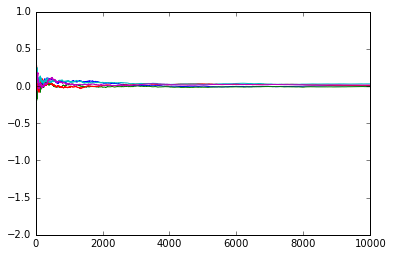

In [4]:
#this is the mean at each step
plt.plot(running_mean(X1,N,N1));

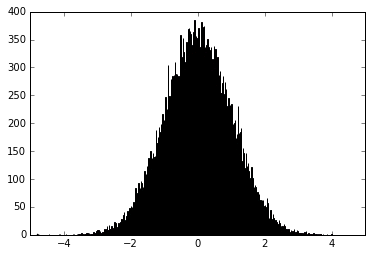

In [5]:
plt.hist(X1,bins=100);

In [6]:
np.random.normal?

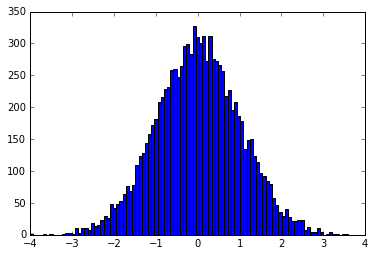

In [7]:
#I sum M1 realizations, and do this M2 times.
# I study how the M2 sums distribute

M1=100
M2=10000
std=10
A1=np.random.normal(0,std,M1*M2)
A1=A1.reshape(M1,M2)
A1_sum=A1.sum(axis=0)/np.sqrt(M1)/std
plt.hist(A1_sum,bins=100);

# Cauchy

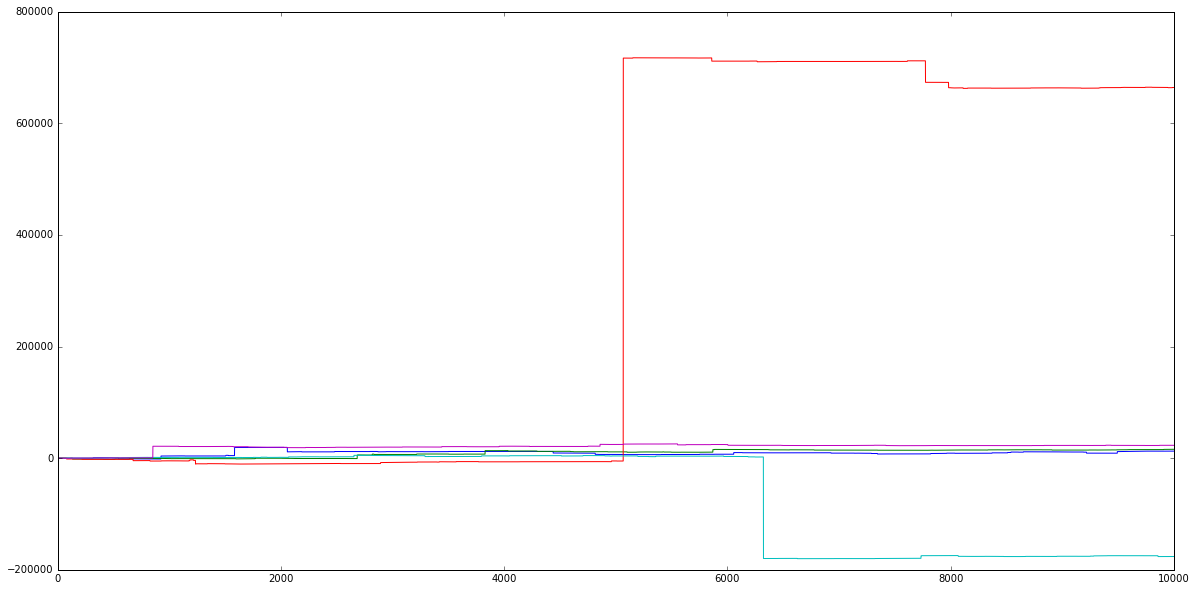

In [8]:
X2=np.random.standard_cauchy(N*N1)
X2=X2.reshape(N,N1)
S2=np.cumsum(X2,axis=0)

plt.figure(figsize=(20,10))
plt.plot(S2);

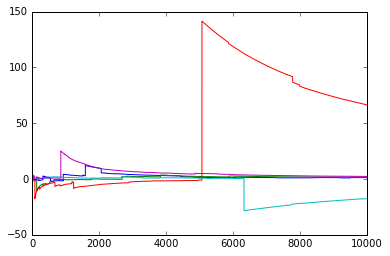

In [9]:
#pdf of the mean should not decay nor diverge; it is always of order 1
plt.plot(running_mean(X2,N,N1));

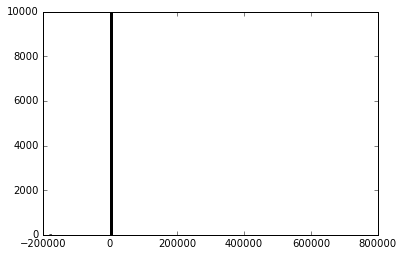

In [10]:
plt.hist(X2,bins=100);

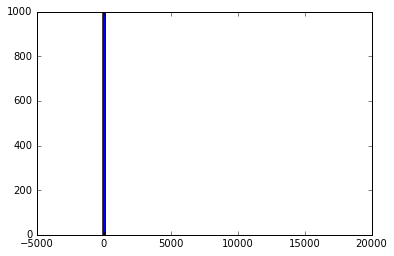

In [11]:
M1=100
M2=1000
A2=np.random.standard_cauchy(M1*M2)
A2=A2.reshape(M1,M2)
A2_sum=A2.sum(axis=0)/(M1)  #should still be cauchy (pdf of the sum)
plt.hist(A2_sum,bins=100);

# Uniform

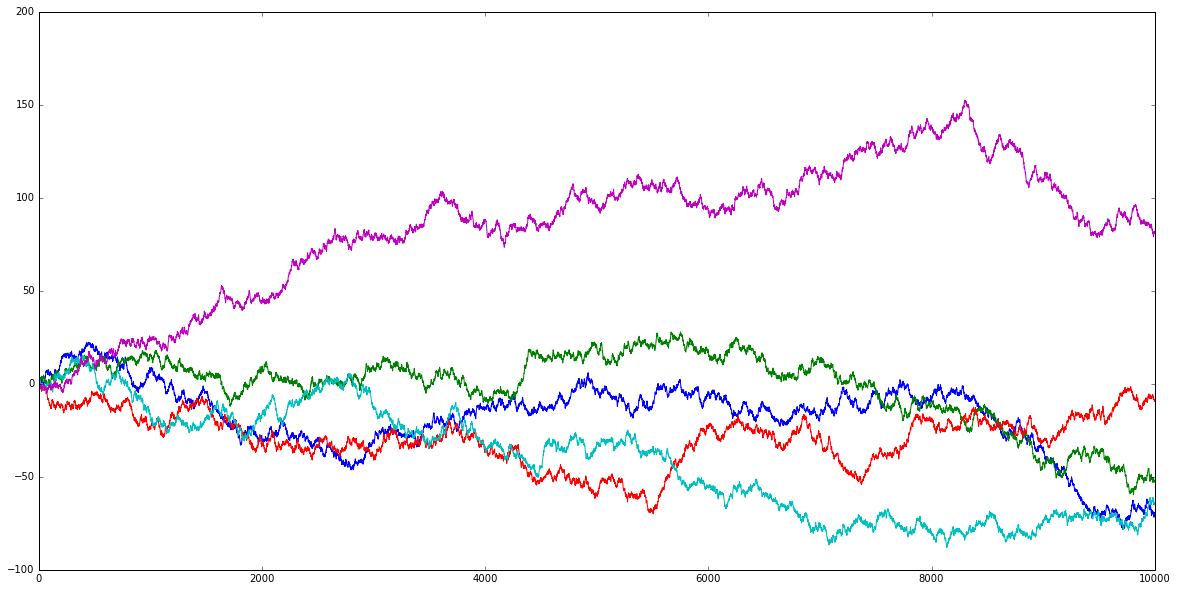

In [12]:
X3=np.random.uniform(-1,1,N*N1)
X3=X3.reshape(N,N1)
S3=np.cumsum(X3,axis=0)

plt.figure(figsize=(20,10))
plt.plot(S3);

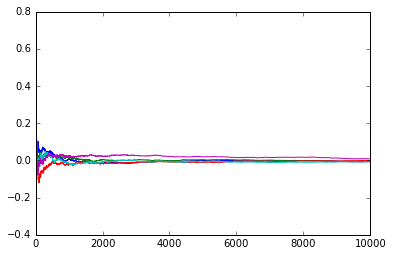

In [13]:
plt.plot(running_mean(X3,N,N1));

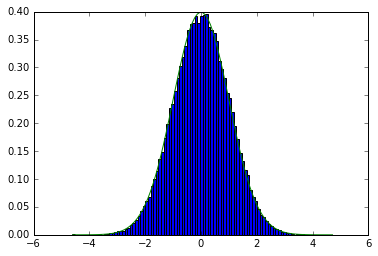

In [14]:
from scipy import stats
M1=100
M2=100000
A3=np.random.uniform(-1,1,M1*M2)
m,v,s,k=stats.uniform.stats(loc=0, scale=2, moments='mvsk')
A3=A3.reshape(M1,M2)
A3_sum=A3.sum(axis=0)/np.sqrt(M1*v)
hist=plt.hist(A3_sum,bins=100,normed=True)


plt.plot(hist[1],stats.norm.pdf(hist[1],0,1),label="gauss")

### corrections from gauss for the uniform

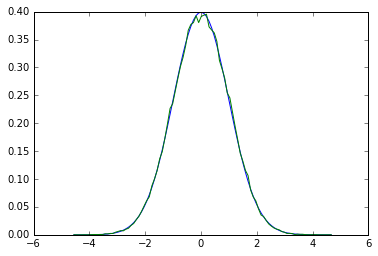

In [15]:
x=np.zeros(len(hist[0]))
for i in range(len(x)):
    x[i]=(hist[1][i]+hist[1][i+1])/2
    

plt.plot(x,stats.norm.pdf(x,0,1),label="gauss")
plt.plot(x,hist[0],label="hist")

In [16]:
h_c=[3,0,-6,0,1]
herm=np.zeros(len(x))
for i in range(5):
    herm+=h_c[i]*x**i
herm*=(k-3)/(24*M1*np.sqrt(v))

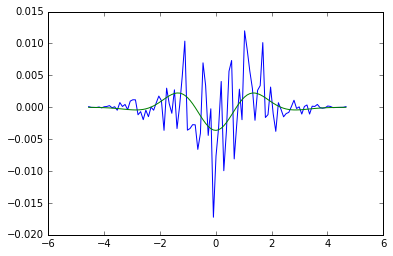

In [17]:
plt.plot(x,hist[0]-stats.norm.pdf(x,0,1),label="difference")
plt.plot(x,herm*stats.norm.pdf(x,0,1))

# Student

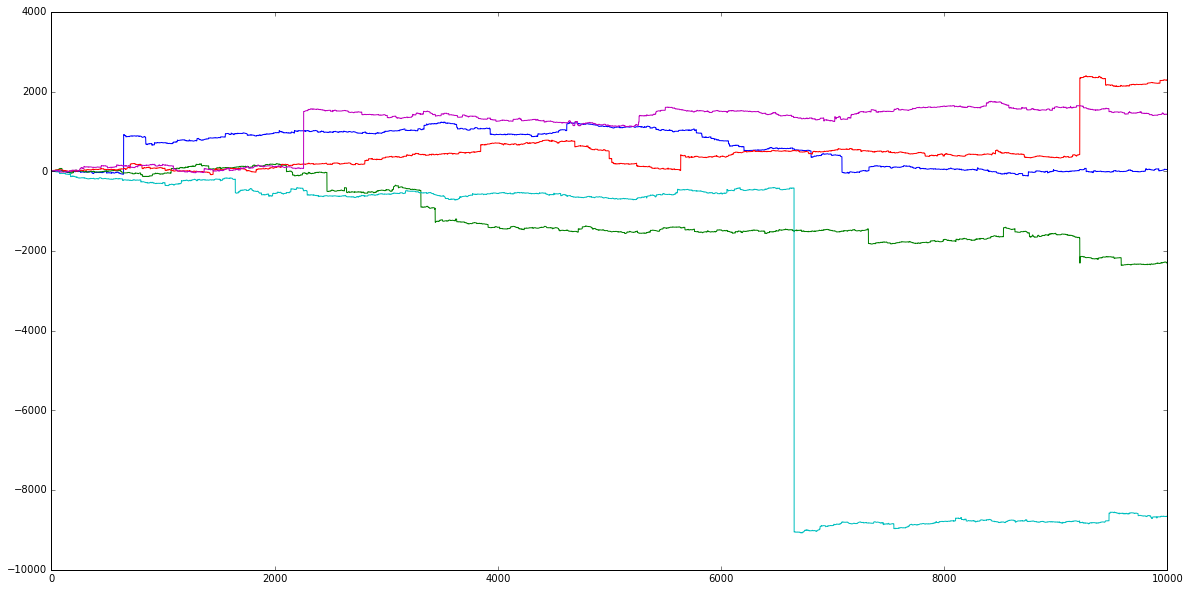

In [18]:
#goes like 1/x^(df+1) for large x (x>>sqrt(df))
#df=1 is the cauchy
#df=inf is the gaussian (wiener)
#df=2 looks like wiener but with jumps

df=1.5
X4=np.random.standard_t(df,N*N1)
X4=X4.reshape(N,N1)
S4=np.cumsum(X4,axis=0)

plt.figure(figsize=(20,10))
plt.plot(S4);

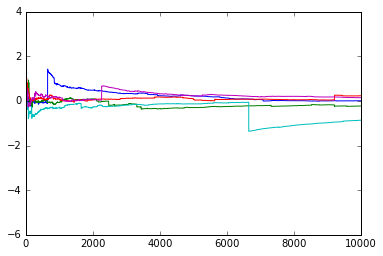

In [19]:
#mean of the series:
#diverges if df<1
#of order 1 if df=1 (cauchy)
# converges for df>1 (law large numbers ok)
plt.plot(running_mean(X4,N,N1));

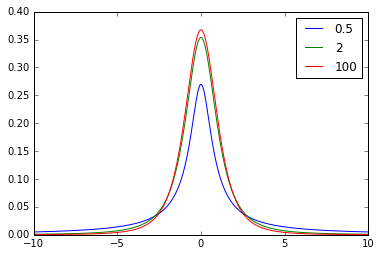

In [20]:
from scipy import stats
x=np.linspace(-10,10,1000)
plt.plot(x,stats.t.pdf(x,0.5),label="0.5")
plt.plot(x,stats.t.pdf(x,2),label="2")
plt.plot(x,stats.t.pdf(x,3),label="100")
plt.legend();

In [21]:
alpha=1
beta=0
#rv = stats.levy_stable(alpha, beta)
#plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

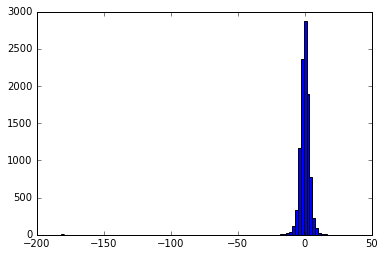

In [22]:
M1=1000
M2=10000
df=2
A4=np.random.standard_t(df,M1*M2)
A4=A4.reshape(M1,M2)
A4_sum=A4.sum(axis=0)/np.sqrt(M1)
plt.hist(A4_sum,bins=100);  

# Compare walks for different time length

### Gauss

In [23]:
N1=5
N2=1000
X1b=np.random.normal(0,1,N2*N1)
X1b=X1b.reshape(N2,N1)
S1b=np.cumsum(X1b)
ratio=N/N2
print(ratio)

10.0


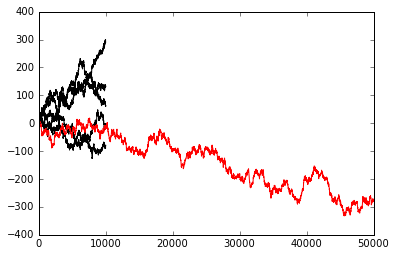

In [24]:
power=1/2

plt.plot(np.arange(0,S1.shape[0]),S1,c='k')
plt.plot(ratio*np.arange(0,S1b.shape[0]),ratio**power*S1b,c='r');


### Cauchy

In [25]:
X2b=np.random.standard_cauchy(N2*N1)
X2b=X2b.reshape(N2,N1)
S2b=np.cumsum(X2b,axis=0)

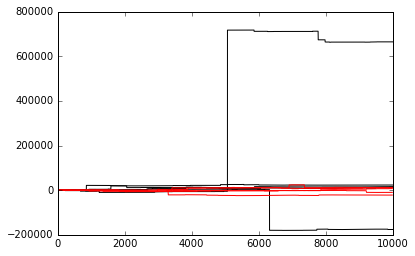

In [26]:
power=1

plt.plot(np.arange(0,S2.shape[0]),S2,c='k')
plt.plot(ratio*np.arange(0,S2b.shape[0]),ratio**power*S2b,c='r');

### Uniform

In [27]:
X3b=np.random.uniform(-1,1,N2*N1)
X3b=X3b.reshape(N2,N1)
S3b=np.cumsum(X3b,axis=0)

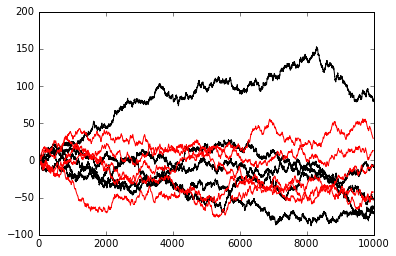

In [28]:
power=1/2

plt.plot(np.arange(0,S3.shape[0]),S3,c='k')
plt.plot(ratio*np.arange(0,S3b.shape[0]),ratio**power*S3b,c='r');

### Student

In [29]:
df=1
N1=10
X4=np.random.standard_t(df,N*N1)
X4=X4.reshape(N,N1)
S4=np.cumsum(X4,axis=0)
X4b=np.random.standard_t(df,N2*N1)
X4b=X4b.reshape(N2,N1)
S4b=np.cumsum(X4b,axis=0)

1.0


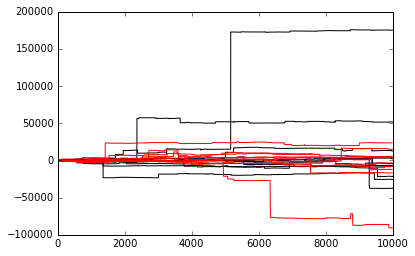

In [30]:
power=1/min(df,2)
print(power)

plt.plot(np.arange(0,S4.shape[0]),S4,c='k')
plt.plot(ratio*np.arange(0,S4b.shape[0]),ratio**power*S4b,c='r');

## Autocorrelation 

In [80]:
SS4=S4.cumsum(axis=1)

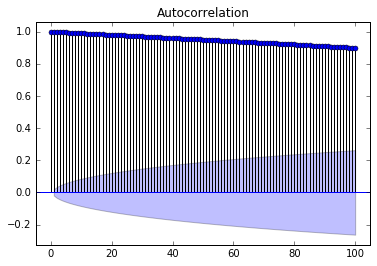

In [81]:
#import statsmodels as sm
#from statsmodels import graphics
import statsmodels.graphics.tsaplots
statsmodels.graphics.tsaplots.plot_acf(SS4[:,2],lags=100);

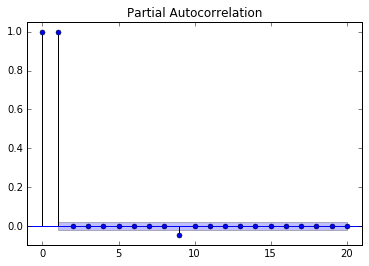

In [82]:
statsmodels.graphics.tsaplots.plot_pacf(SS4[:,1],lags=20);

In [83]:
import statsmodels.tsa.stattools
acf=statsmodels.tsa.stattools.acf(SS4[:,0],nlags=10)
acf

array([1.        , 0.99862619, 0.99725237, 0.99587841, 0.99450509,
       0.99313195, 0.99175914, 0.99038621, 0.98901339, 0.98752623,
       0.98603899])

In [84]:
pacf=statsmodels.tsa.stattools.pacf(SS4[:,0],nlags=10)
pacf

array([ 1.00000000e+00,  9.98726060e-01, -7.40242373e-04, -7.93880048e-04,
       -4.86455253e-04, -6.64739387e-04, -6.13712513e-04, -7.87508798e-04,
       -6.95777176e-04, -4.56845366e-02, -8.37127018e-04])

In [86]:
statsmodels.tsa.stattools.pacf?

## ARIMA

In [92]:
from statsmodels.tsa.arima_model import ARIMA
series=X1[0:100,0]

model = ARIMA(series, order=(2, 1, 1))  
results_ARIMA_211 = model.fit(disp=-1)  
predict_ARIMA_211=results_ARIMA_211.predict(typ="levels")

/scratch/baruselli/inst/intelpython35/lib/python3.5/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/scratch/baruselli/inst/intelpython35/lib/python3.5/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/scratch/baruselli/inst/intelpython35/lib/python3.5/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


/scratch/baruselli/inst/intelpython35/lib/python3.5/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


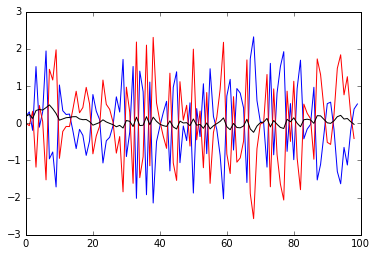

In [93]:
plt.plot(series)
plt.plot(results_ARIMA_211.fittedvalues, color='red')
plt.plot(predict_ARIMA_211, color='k')